In [2]:
import pandas as pd
import matplotlib as plt

In [3]:
data=pd.read_csv("chipotle.csv")

In [4]:
print(data.head())

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description  item_price  Unnamed: 5  
0                                                NaN        2.39         NaN  
1                                       [Clementine]        3.39         NaN  
2                                            [Apple]        3.39         NaN  
3                                                NaN        2.39         NaN  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98         NaN  


In [5]:
print(data.tail())

      order_id  quantity           item_name  \
4617      1833         1       Steak Burrito   
4618      1833         1       Steak Burrito   
4619      1834         1  Chicken Salad Bowl   
4620      1834         1  Chicken Salad Bowl   
4621      1834         1  Chicken Salad Bowl   

                                     choice_description  item_price  \
4617  [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...       11.75   
4618  [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...       11.75   
4619  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...       11.25   
4620  [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...        8.75   
4621  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...        8.75   

      Unnamed: 5  
4617         NaN  
4618         NaN  
4619         NaN  
4620         NaN  
4621         NaN  


In [6]:
#avg rev per order
data.quantity.astype('str').astype('int')
data['revenue']=data['quantity']*data['item_price']

#created a revenue column

In [7]:
byorder=data.groupby(['order_id']).sum(['revenue'])
#summed rev by order id

In [11]:
print(byorder.head())

          quantity  item_price  Unnamed: 5  revenue
order_id                                           
1                4       11.56         0.0    11.56
2                2       16.98         0.0    33.96
3                2       12.67         0.0    12.67
4                2       21.00         0.0    21.00
5                2       13.70         0.0    13.70


In [8]:
print(byorder.shape[0]) #total number of order as this gives rows
print(byorder.mean()['revenue']) #avg rev per rev
print(byorder.sum()['revenue']) #total rev

1834
21.394231188658654
39237.02


In [12]:
byitem=data.groupby(['item_name'])

In [13]:
byitem.head()

,order_id,quantity,item_name,choice_description,item_price,Unnamed: 5,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,NaN,2.39
1,1,1,Izze,[Clementine],3.39,NaN,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,NaN,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,NaN,33.96
...,...,...,...,...,...,...,...
3363,1349,1,Chicken Salad,"[Fresh Tomato Salsa (Mild), [Pinto Beans, Rice...",8.49,NaN,8.49
3471,1395,1,Veggie Salad,"[[Tomatillo-Green Chili Salsa (Medium), Roaste...",8.49,NaN,8.49
3502,1406,1,Steak Salad,"[[Lettuce, Fajita Veggies]]",8.69,NaN,8.69
3749,1499,1,Carnitas Salad Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.89,NaN,11.89


In [16]:
countdata=byitem.sum()
print(countdata.head())

                       order_id  quantity  item_price  Unnamed: 5  revenue
item_name                                                                 
6 Pack Soft Drink         52322        55      356.95         0.0   369.93
Barbacoa Bowl             53972        66      672.36         0.0   672.36
Barbacoa Burrito          74718        91      894.75         0.0   894.75
Barbacoa Crispy Tacos      5613        12      120.21         0.0   138.71
Barbacoa Salad Bowl        9708        10      106.40         0.0   106.40


In [17]:
print(countdata.sort_values(['quantity'],ascending=False).head())

                     order_id  quantity  item_price  Unnamed: 5  revenue
item_name                                                               
Chicken Bowl           713926       761     7342.73         0.0  8044.63
Chicken Burrito        497303       591     5575.82         0.0  6387.06
Chips and Guacamole    449959       506     2201.04         0.0  2475.62
Steak Burrito          328437       386     3851.43         0.0  4236.13
Canned Soft Drink      304753       351      438.75         0.0   603.75


In [18]:
print(countdata.sort_values(['quantity'],ascending=False).head(1)) #prints the most ordered item

              order_id  quantity  item_price  Unnamed: 5  revenue
item_name                                                        
Chicken Bowl    713926       761     7342.73         0.0  8044.63


In [24]:
#how many times more than 1 soda is ordered?
recs_morethan1soda=data[(data.item_name == 'Canned Soda') & (data.quantity>1)]

In [25]:
print(recs_morethan1soda.head())

     order_id  quantity    item_name choice_description  item_price  \
18          9         2  Canned Soda           [Sprite]        2.18   
51         23         2  Canned Soda     [Mountain Dew]        2.18   
162        73         2  Canned Soda        [Diet Coke]        2.18   
171        76         2  Canned Soda  [Diet Dr. Pepper]        2.18   
350       150         2  Canned Soda        [Diet Coke]        2.18   

     Unnamed: 5  revenue  
18          NaN     4.36  
51          NaN     4.36  
162         NaN     4.36  
171         NaN     4.36  
350         NaN     4.36  


In [26]:
print(recs_morethan1soda.count())

order_id              20
quantity              20
item_name             20
choice_description    20
item_price            20
Unnamed: 5             0
revenue               20
dtype: int64


In [29]:
print(len(recs_morethan1soda)) #prints length of this data frame which is the one with records that have >1 canned soda

20


In [30]:
#how many times Veggie Salad Bowl was ordered
vsbowl=data[(data.item_name=='Veggie Salad Bowl')]
print(vsbowl.head())

     order_id  quantity          item_name  \
186        83         1  Veggie Salad Bowl   
295       128         1  Veggie Salad Bowl   
455       195         1  Veggie Salad Bowl   
496       207         1  Veggie Salad Bowl   
960       394         1  Veggie Salad Bowl   

                                    choice_description  item_price  \
186  [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...       11.25   
295  [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...       11.25   
455  [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...       11.25   
496  [Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...       11.25   
960  [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...        8.75   

     Unnamed: 5  revenue  
186         NaN    11.25  
295         NaN    11.25  
455         NaN    11.25  
496         NaN    11.25  
960         NaN     8.75  


In [31]:
print(vsbowl.count())

order_id              18
quantity              18
item_name             18
choice_description    18
item_price            18
Unnamed: 5             0
revenue               18
dtype: int64


In [32]:
print(vsbowl['quantity'].sum())

18


In [33]:
print(len(vsbowl))

18


In [34]:
#sort by name of the item and print
print(data.sort_values(['item_name'],ascending=True))

      order_id  quantity          item_name  \
3389      1360         2  6 Pack Soft Drink   
341        148         1  6 Pack Soft Drink   
1849       749         1  6 Pack Soft Drink   
1860       754         1  6 Pack Soft Drink   
2713      1076         1  6 Pack Soft Drink   
...        ...       ...                ...   
2384       948         1  Veggie Soft Tacos   
781        322         1  Veggie Soft Tacos   
2851      1132         1  Veggie Soft Tacos   
1699       688         1  Veggie Soft Tacos   
1395       567         1  Veggie Soft Tacos   

                                     choice_description  item_price  \
3389                                        [Diet Coke]       12.98   
341                                         [Diet Coke]        6.49   
1849                                             [Coke]        6.49   
1860                                        [Diet Coke]        6.49   
2713                                             [Coke]        6.49   
...      

In [35]:
print(data.sort_values(['item_name'],ascending=True).head())

      order_id  quantity          item_name choice_description  item_price  \
3389      1360         2  6 Pack Soft Drink        [Diet Coke]       12.98   
341        148         1  6 Pack Soft Drink        [Diet Coke]        6.49   
1849       749         1  6 Pack Soft Drink             [Coke]        6.49   
1860       754         1  6 Pack Soft Drink        [Diet Coke]        6.49   
2713      1076         1  6 Pack Soft Drink             [Coke]        6.49   

      Unnamed: 5  revenue  
3389         NaN    25.96  
341          NaN     6.49  
1849         NaN     6.49  
1860         NaN     6.49  
2713         NaN     6.49  


In [38]:
print(data.describe())

          order_id     quantity   item_price  Unnamed: 5      revenue
count  4622.000000  4622.000000  4622.000000         0.0  4622.000000
mean    927.254868     1.075725     7.464336         NaN     8.489186
std     528.890796     0.410186     4.245557         NaN    12.632060
min       1.000000     1.000000     1.090000         NaN     1.090000
25%     477.250000     1.000000     3.390000         NaN     3.990000
50%     926.000000     1.000000     8.750000         NaN     8.750000
75%    1393.000000     1.000000     9.250000         NaN    10.980000
max    1834.000000    15.000000    44.250000         NaN   663.750000


In [39]:
print(data['item_price'].describe())

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64


In [49]:
#hist of top 5 items
top5data=countdata.sort_values(['quantity'],ascending=False).head(5)
print(top5data)

                     order_id  quantity  item_price  Unnamed: 5  revenue
item_name                                                               
Chicken Bowl           713926       761     7342.73         0.0  8044.63
Chicken Burrito        497303       591     5575.82         0.0  6387.06
Chips and Guacamole    449959       506     2201.04         0.0  2475.62
Steak Burrito          328437       386     3851.43         0.0  4236.13
Canned Soft Drink      304753       351      438.75         0.0   603.75


In [44]:
top5data=countdata[(countdata.item_name or countdata.quantity)].head(5)
print(top5data)

AttributeError: 'DataFrame' object has no attribute 'item_name'

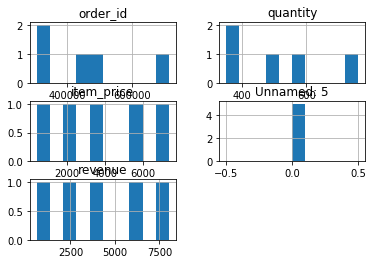

In [50]:
hist=top5data.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cc2f150>]],
      dtype=object)

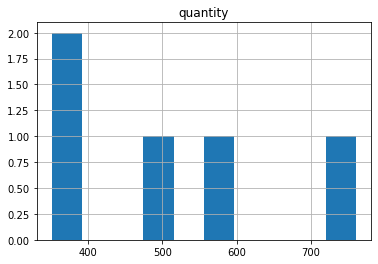

In [53]:
top5data.hist(column='quantity')

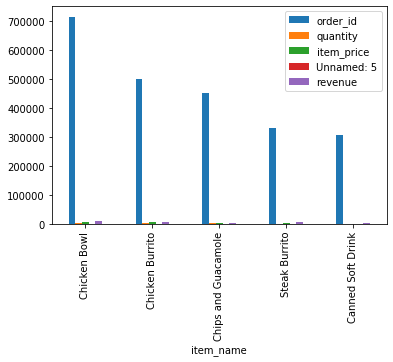

In [56]:
top5data.plot(kind='bar')

In [57]:
top5new=top5data['quantity'].copy()

In [58]:
print(top5new)

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64


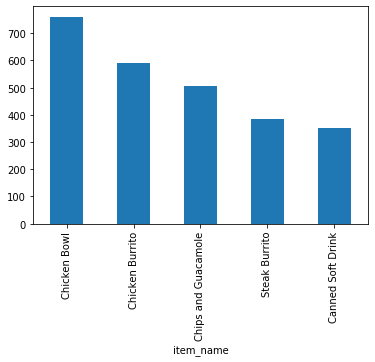

In [60]:
top5new.plot(kind='bar')

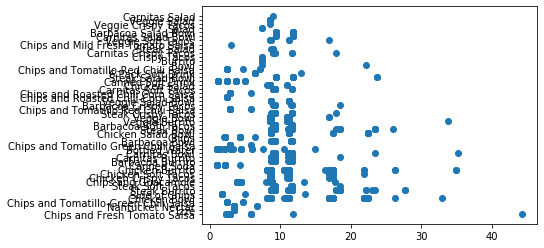

In [65]:
import matplotlib.pyplot as pl
pl.scatter(data.item_price,data.item_name)

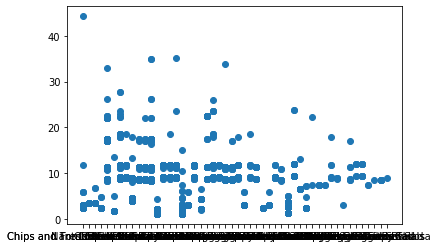

In [63]:
pl.scatter(data.item_name,data.item_price)